In [1]:
!!pip install kaggle

['Requirement already satisfied: kaggle in /usr/local/lib/python3.11/dist-packages (1.7.4.5)',
 'Requirement already satisfied: bleach in /usr/local/lib/python3.11/dist-packages (from kaggle) (6.2.0)',
 'Requirement already satisfied: certifi>=14.05.14 in /usr/local/lib/python3.11/dist-packages (from kaggle) (2025.6.15)',
 'Requirement already satisfied: charset-normalizer in /usr/local/lib/python3.11/dist-packages (from kaggle) (3.4.2)',
 'Requirement already satisfied: idna in /usr/local/lib/python3.11/dist-packages (from kaggle) (3.10)',
 'Requirement already satisfied: protobuf in /usr/local/lib/python3.11/dist-packages (from kaggle) (5.29.5)',
 'Requirement already satisfied: python-dateutil>=2.5.3 in /usr/local/lib/python3.11/dist-packages (from kaggle) (2.9.0.post0)',
 'Requirement already satisfied: python-slugify in /usr/local/lib/python3.11/dist-packages (from kaggle) (8.0.4)',
 'Requirement already satisfied: requests in /usr/local/lib/python3.11/dist-packages (from kaggle) 

In [2]:
# Step 1: Upload the kaggle.json file
from google.colab import files
files.upload()  # Choose your kaggle.json file

# Step 2: Move it to the appropriate directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download and unzip the dataset
!kaggle datasets download -d imtkaggleteam/eye-tracking-autism
!unzip -q eye-tracking-autism.zip -d eye_tracking_data

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/imtkaggleteam/eye-tracking-autism
License(s): CC-BY-SA-4.0
 79% 113M/143M [00:00<00:00, 1.17GB/s]
100% 143M/143M [00:00<00:00, 1.04GB/s]


In [3]:
!unzip -l eye-tracking-autism.zip

Archive:  eye-tracking-autism.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  8777983  2023-10-09 20:20   Eye-tracking Output/1.csv
 12002259  2023-10-09 20:20   Eye-tracking Output/10.csv
 38149489  2023-10-09 20:20   Eye-tracking Output/11.csv
 28248042  2023-10-09 20:20   Eye-tracking Output/12.csv
  5479465  2023-10-09 20:20   Eye-tracking Output/13.csv
 10015202  2023-10-09 20:20   Eye-tracking Output/14.csv
 10936673  2023-10-09 20:20   Eye-tracking Output/15.csv
 27436424  2023-10-09 20:20   Eye-tracking Output/16.csv
119416461  2023-10-09 20:20   Eye-tracking Output/17.csv
 22345944  2023-10-09 20:20   Eye-tracking Output/18.csv
 26166436  2023-10-09 20:20   Eye-tracking Output/19.csv
  6222295  2023-10-09 20:20   Eye-tracking Output/2.csv
 35948324  2023-10-09 20:20   Eye-tracking Output/20.csv
 88900698  2023-10-09 20:20   Eye-tracking Output/21.csv
 20462759  2023-10-09 20:20   Eye-tracking Output/22.csv
 41454009  2023-10-09 20:20   Eye-tracking 

U ovoj sekciji učitan je fajl `Metadata_Participants.csv`, koji sadrži osnovne informacije o učesnicima, poput **pola**, **starosti**, **klase (ASD/TD)** i **CARS scroe**. Analizirani su osnovni statistički pokazatelji i broj učesnika po spolu i klasi. Vizualizacije uključuju:

*   List item Bar grafikone za raspodjelu po spolu i klasi
*   List item Histogram starosti i CARS rezultata

Ova analiza pruža osnovni pregled strukture uzorka i osigurava bolju interpretaciju u daljoj obradi podataka.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
meta_df = pd.read_csv("eye_tracking_data/Metadata_Participants.csv")
meta_df.head()

,ParticipantID,Gender,Age,Class,CARS Score
0,1,M,7.0,ASD,32.5
1,2,F,8.9,ASD,36.5
2,3,M,4.4,ASD,27.0
3,4,M,6.9,ASD,35.0
4,5,M,8.9,ASD,31.0


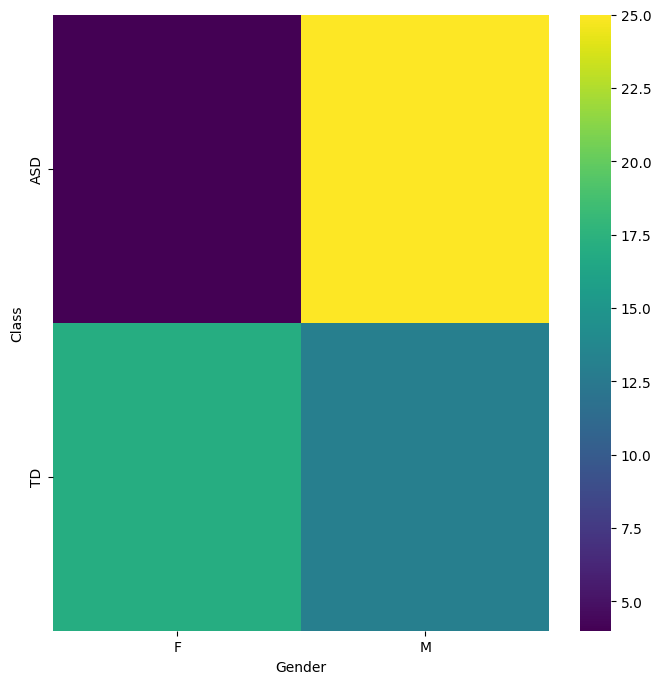

In [6]:
# @title Gender vs Class

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Class'].value_counts()
    for x_label, grp in meta_df.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Class')

Dimenzije i tipovi podataka:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ParticipantID  59 non-null     int64  
 1   Gender         59 non-null     object 
 2   Age            59 non-null     float64
 3   Class          59 non-null     object 
 4   CARS Score     29 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB
None

Osnovna statistika:
       ParticipantID        Age  CARS Score
count      59.000000  59.000000   29.000000
mean       30.000000   7.883051   32.965517
std        17.175564   2.791252    6.551896
min         1.000000   2.700000   17.000000
25%        15.500000   5.750000   27.000000
50%        30.000000   8.100000   34.500000
75%        44.500000   9.800000   36.500000
max        59.000000  12.900000   45.000000

Broj učesnika po spolu:
Gender
M    38
F    21
Name: count, dtype: int64

Br

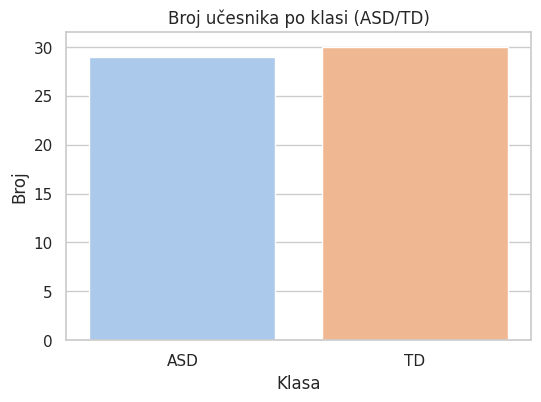

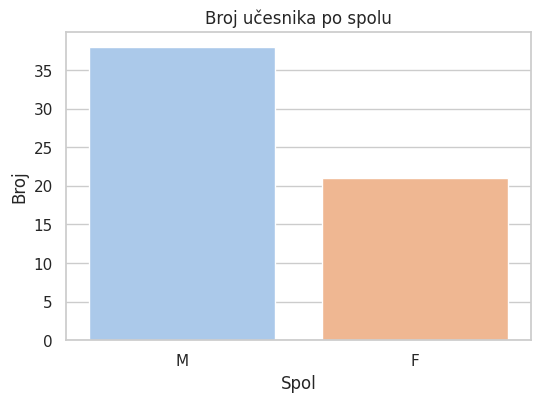

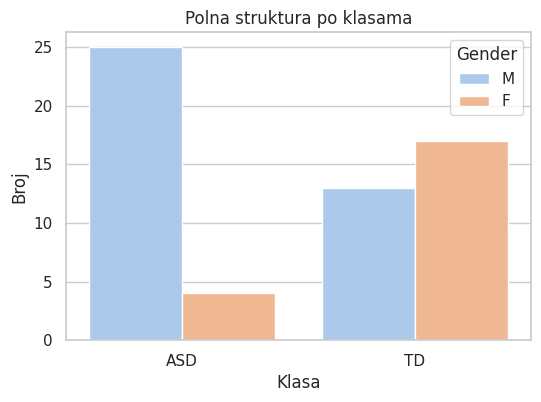

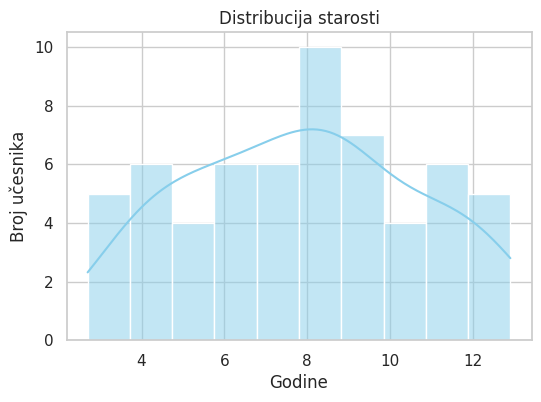

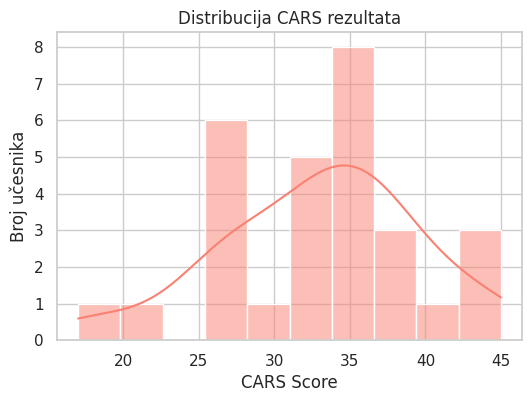

In [7]:
# Osnovne informacije
print("Dimenzije i tipovi podataka:")
print(meta_df.info())

print("\nOsnovna statistika:")
print(meta_df.describe())

# Broj učesnika po spolu
print("\nBroj učesnika po spolu:")
print(meta_df['Gender'].value_counts())

# Broj učesnika po klasi (ASD/TD)
print("\nBroj učesnika po klasi:")
print(meta_df['Class'].value_counts())

# Kombinovana distribucija spola i klase
print("\nDistribucija po spolu i klasi:")
print(meta_df.groupby(['Class', 'Gender']).size())

# Vizualizacije
sns.set(style="whitegrid")

# Bar chart: Broj po klasi
plt.figure(figsize=(6, 4))
sns.countplot(data=meta_df, x='Class', hue='Class', palette='pastel', legend=False)
plt.title("Broj učesnika po klasi (ASD/TD)")
plt.xlabel("Klasa")
plt.ylabel("Broj")
plt.show()

# Bar chart: Broj po spolu
plt.figure(figsize=(6, 4))
sns.countplot(data=meta_df, x='Gender', hue='Gender', palette='pastel', legend=False)
plt.title("Broj učesnika po spolu")
plt.xlabel("Spol")
plt.ylabel("Broj")
plt.show()

# Bar chart: Pol po klasama
plt.figure(figsize=(6, 4))
sns.countplot(data=meta_df, x='Class', hue='Gender', palette='pastel')
plt.title("Polna struktura po klasama")
plt.xlabel("Klasa")
plt.ylabel("Broj")
plt.show()

# Histogram: Starost
plt.figure(figsize=(6, 4))
sns.histplot(meta_df['Age'], bins=10, kde=True, color="skyblue")
plt.title("Distribucija starosti")
plt.xlabel("Godine")
plt.ylabel("Broj učesnika")
plt.show()

# Histogram: CARS Score
plt.figure(figsize=(6, 4))
sns.histplot(meta_df['CARS Score'], bins=10, kde=True, color="salmon")
plt.title("Distribucija CARS rezultata")
plt.xlabel("CARS Score")
plt.ylabel("Broj učesnika")
plt.show()

In [8]:
df1 = pd.read_csv("eye_tracking_data/Eye-tracking Output/1.csv")
df1.head(10)

/tmp/ipython-input-8-1631182405.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("eye_tracking_data/Eye-tracking Output/1.csv")


,Unnamed: 0,RecordingTime [ms],Time of Day [h:m:s:ms],Trial,Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Participant,Color,Tracking Ratio [%],...,Gaze Vector Left Y,Gaze Vector Left Z,Annotation Name,Annotation Description,Annotation Tags,Mouse Position X [px],Mouse Position Y [px],Scroll Direction X,Scroll Direction Y,Content
0,0,4780015.315,13:22:17:254,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,-,-,-,-,-,-,-,-,-,eye tracking (ballon droite).avi
1,1,4780020.865,13:22:17:260,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,0.0000,0.0000,-,-,-,-,-,-,-,-
2,2,4780040.758,13:22:17:279,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,0.0000,0.0000,-,-,-,-,-,-,-,-
3,3,4780080.503,13:22:17:319,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,0.0000,0.0000,-,-,-,-,-,-,-,-
4,4,4780120.360,13:22:17:359,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,0.0000,0.0000,-,-,-,-,-,-,-,-
5,5,4780140.235,13:22:17:379,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,0.0000,0.0000,-,-,-,-,-,-,-,-
6,6,4780160.125,13:22:17:399,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,0.0000,0.0000,-,-,-,-,-,-,-,-
7,7,4780179.991,13:22:17:419,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,0.0000,0.0000,-,-,-,-,-,-,-,-
8,8,4780199.868,13:22:17:439,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,0.0000,0.0000,-,-,-,-,-,-,-,-
9,9,4780219.754,13:22:17:458,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,0.0000,0.0000,-,-,-,-,-,-,-,-


In [9]:
# Prikaz svih kolona
print(df1.columns.tolist())

['Unnamed: 0', 'RecordingTime [ms]', 'Time of Day [h:m:s:ms]', 'Trial', 'Stimulus', 'Export Start Trial Time [ms]', 'Export End Trial Time [ms]', 'Participant', 'Color', 'Tracking Ratio [%]', 'Category Group', 'Category Right', 'Category Left', 'Index Right', 'Index Left', 'Pupil Diameter Right [mm]', 'Pupil Diameter Left [mm]', 'Point of Regard Right X [px]', 'Point of Regard Right Y [px]', 'Point of Regard Left X [px]', 'Point of Regard Left Y [px]', 'AOI Name Right', 'AOI Name Left', 'Gaze Vector Right X', 'Gaze Vector Right Y', 'Gaze Vector Right Z', 'Gaze Vector Left X', 'Gaze Vector Left Y', 'Gaze Vector Left Z', 'Annotation Name', 'Annotation Description', 'Annotation Tags', 'Mouse Position X [px]', 'Mouse Position Y [px]', 'Scroll Direction X', 'Scroll Direction Y', 'Content']


In [11]:
import os
import pandas as pd

folder_path = "eye_tracking_data/Eye-tracking Output"

# Dictionary to store filename and its unique participants
file_participants = {}

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        unique_participants = df['Participant'].unique()
        file_participants[filename] = unique_participants

# Print results
for file, participants in file_participants.items():
    print(f"File: {file}")
    print("Participants:", participants)
    print('-' * 40)


/tmp/ipython-input-11-3665371680.py:12: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipython-input-11-3665371680.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipython-input-11-3665371680.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipython-input-11-3665371680.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipython-input-11-3665371680.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipython-input-11-3665371680.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.

File: 11.csv
Participants: ['Unidentified(Neg)' '54' '59' '25' '26' '58' '29' '56' '30' '57' '52'
 '31' '49' '36']
----------------------------------------
File: 4.csv
Participants: ['50' 'Unidentified(Pos)' '20' '19' '52' '49' '15' '17' '21'
 'Unidentified(Neg)' '18' '42']
----------------------------------------
File: 3.csv
Participants: ['Unidentified(Neg)' '54' '59' '25' '26' '58' '29' '56' '30' '57' '52'
 '31' '49' '36']
----------------------------------------
File: 14.csv
Participants: [20 19 17 21 18]
----------------------------------------
File: 25.csv
Participants: [50 43 48 58 52 49 51 55 '55' '44' '45' '53' '47' 'Unidentified(Neg)' '54'
 '46' '59' '42' '56' '30' '13' 'Unidentified(Pos)' '20' '19' '27' '17'
 '15' '22' 22 21 25 26 23 28 24 18 29 14]
----------------------------------------
File: 8.csv
Participants: ['Unidentified(Neg)' '54' '59' '25' '26' '58' '29' '56' '30' '57' '52'
 '31' '49' '36']
----------------------------------------
File: 7.csv
Participants: ['Unide

/tmp/ipython-input-11-3665371680.py:12: DtypeWarning: Columns (7,15,16,17,18,19,20,21,22,23,24,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
